In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

/Users/mike/Documents/Methods-of-optimization/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def gen_classes(class_num, per_class, lower_b, upper_b):
    res = []
    class_areas = []
    for i in range(class_num):
        temp_class = []
        low_b = lower_b + i * (upper_b - lower_b) / class_num
        high_b = lower_b + (i + 1) * (upper_b - lower_b) / class_num
        #class_areas += [random.uniform(, ), random.uniform()]
        for j in range(per_class):
            temp_class += [[random.uniform(lower_b, high_b), random.uniform(low_b, high_b), i]]
        res += [temp_class]
    return res
def get_data(temp, dim):
    x = []
    y = []
    for j in temp[dim]:
        x += [j[0]]
        y += [j[1]]
    return x, y
temp = gen_classes(2, 100, 0, 1000)

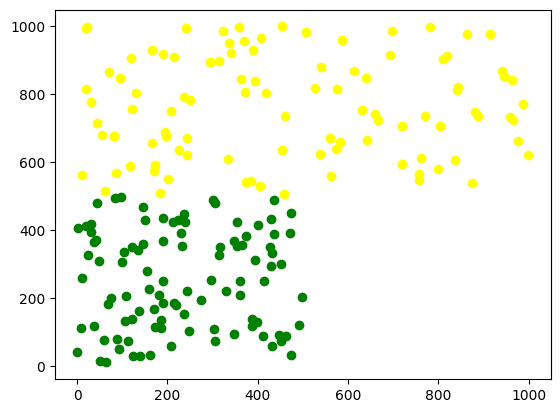

In [3]:
n_temp = []
for i in temp:
    n_temp += i
x, y = get_data(temp, 0)
axes = plt.figure().add_subplot()
axes.scatter(x, y, c ="green")
x, y = get_data(temp, 1)
axes.scatter(x, y, c = "yellow") 
plt.show()

In [4]:
x_train = []
y_train = []
ans = [[1, 0], [0, 1]]
for i in n_temp:
    x_train += [i[0:2]]
    y_train += [ans[i[2]]]

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu", input_shape = (2,)),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

/Users/mike/Documents/Methods-of-optimization/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(np.array(x_train), np.array(y_train), epochs=5, batch_size=30)

Epoch 1/5


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5333 - loss: 1.2828

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5133 - loss: 0.9345


Epoch 2/5


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.6931

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5000 - loss: 0.6932


Epoch 3/5


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6667 - loss: 0.6931

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5472 - loss: 0.6932


Epoch 4/5


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3333 - loss: 0.6931

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4145 - loss: 0.6932


Epoch 5/5


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6333 - loss: 0.6931

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5427 - loss: 0.6932
